Data Science Task

In [1]:
print("importing required libraries")
import pandas as pd
import numpy as np
import ast
import time
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


importing required libraries


In [2]:
df_data=pd.read_csv('/content/raw_furniture_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,148,149,150,152,153,154,155,156) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_data.shape

(5749, 159)

In [4]:
df_data.head(5)

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gab Lounge Chair,Icons Of Denmark,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '65', 'height': '70', 'package depth...",cm,10,kg,"{'frame material': 'Solid oak wood', 'upholste...",{'frame finish': 'Smoked Oiled Oak'},DK,armchairs,seating,furniture,"['wood', 'oak']",GBP,1585,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Violin Dining Chair, Upholstered Seat",GUBI,['https://res.cloudinary.com/clippings/image/u...,"{'back height': '35', 'depth': '54', 'frame de...",cm,5.5,kg,{'backrest material': 'Steam-bent solid walnut...,"{'backrest finish': 'American Walnut Oiled', '...",NaN,dining-chairs,seating,furniture,"['steel', 'foam', 'wood', 'walnut']",EUR,791.64,451.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis and data pre-processing

In [5]:
df_data=df_data.iloc[:, 0:17]

In [6]:
df_data.head(3)

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65


In [7]:
df_data.isnull().sum()


product_name                  0
brand_name                    0
product_images                0
dimensions                    1
dimension_units             199
weight                     2083
weight_units               2091
materials                     1
materials_finish              1
fabrication_origin         4558
product_type_1                1
product_type_2                1
product_type_3                1
basic_materials_cleaned       1
currency                      1
retail_price                  1
fabrication_price             1
dtype: int64

In [8]:
df_data = df_data[df_data['dimensions'].notna()]

In [9]:
df_data=df_data[df_data.dimensions.str.startswith(('{'))]

In [10]:
df_data['dimensions'] =  df_data['dimensions'].map(lambda d : ast.literal_eval(d))

In [11]:
df_data = df_data.join(pd.DataFrame(df_data['dimensions'].to_dict()).T)
df_data

,product_name,brand_name,product_images,dimensions,dimension_units,weight,weight_units,materials,materials_finish,fabrication_origin,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,currency,retail_price,fabrication_price,depth,height,seat height,width,seat depth,package depth,package height,package width,back height,frame depth,frame width,legs thickness diameter,seat width,package depth 2,package height 2,package width 2,diameter,frame package depth,frame package height,frame package width,table top package depth,table top package height,table top package width,...,packaging depth box 2,packaging height box 1,packaging height box 2,packaging width box 1,packaging width box 2,package depth for frame,package height for frame,package width for frame,package for legs depth,package for legs height,package for legs width,package for top depth,package for top height,package for top width,pole diameter,bracket depth,bracket height,bracket width,shelf length,pair of trestles package depth,pair of trestles package height,pair of trestles package width,carton for legs depth,carton for legs height,carton for legs width,carton for top depth,carton for top height,carton for top width,carton for frame depth,carton for frame height,carton for frame width,package depth for legs,package height for legs,package width for legs,folding depth,folding height,packaging 2 depth,packaging 2 height,packaging 2 width,base packaging length
0,Royce Lounge Chair,SP01,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '76', 'height': '79', 'seat height':...",cm,NaN,NaN,"{'base material': 'Metal', 'seat and back mate...",{'base finish': 'Black Chrome G02B'},NaN,lounge-chairs,seating,furniture,"['metal', 'foam', 'polyurethane']",GBP,1812,1087.2,76,79,44.5,73.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ruff Small Armchair,Moroso,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '78', 'height': '72', 'seat depth': ...",cm,28,kg,"{'feet material': 'PVC', 'foam material': 'Fla...",{},NaN,armchairs,seating,furniture,"['pvc', 'polyurethane', 'steel']",GBP,1320,792,78,72,43,89,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hippo Dining Chair,NORR11,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '59', 'height': '79.5', 'package dep...",cm,6.7,kg,{'backrest material': 'FSC certified solid oak...,{'frame finish': 'Oak Natural'},LV,dining-chairs,seating,furniture,"['oak', 'foam', 'wood', 'plywood']",GBP,583,320.65,59,79.5,49,47.5,NaN,64,80,52.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gab Lounge Chair,Icons Of Denmark,['https://res.cloudinary.com/clippings/image/u...,"{'depth': '65', 'height': '70', 'package depth...",cm,10,kg,"{'frame material': 'Solid oak wood', 'upholste...",{'frame finish': 'Smoked Oiled Oak'},DK,armchairs,seating,furniture,"['wood', 'oak']",GBP,1585,951,65,70,37.5,70,NaN,80,90,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Violin Dining Chair, Upholstered Seat",GUBI,['https://res.cloudinary.com/clippings/image/u...,"{'back height': '35', 'depth': '54', 'frame de...",cm,5.5,kg,{'backrest material': 'Steam-bent solid walnut...,"{'backrest finish': 'American Walnut Oiled', '...",NaN,dining-chairs,seating,furniture,"['steel', 'foam', 'wood', 'walnut'

In [12]:
limitPer = len(df_data) * .30
df_data = df_data.dropna(thresh=limitPer, axis=1)

In [13]:
df_data.dimension_units.value_counts()

cm    5540
m3       8
kg       1
Name: dimension_units, dtype: int64

In [14]:
df_data=df_data[df_data['dimension_units']!='kg']

In [15]:
df_data=df_data[df_data['dimension_units']!='m3']

In [16]:
df_data['depth']

0        76
1        78
2        59
3        65
4        54
       ... 
5744     87
5745    110
5746     37
5747    NaN
5748     36
Name: depth, Length: 5738, dtype: object

In [17]:
df_data=df_data[df_data['depth'].fillna("0").str.isnumeric()]

In [18]:
df_data['depth']=df_data['depth'].astype(float)
df_data['depth']=df_data['depth'].replace(0,np.nan)
df_data['depth']=df_data['depth'].interpolate(method ='linear')

In [19]:
df_data=df_data[df_data['height'].fillna("0").str.isnumeric()]
df_data['height']=df_data['height'].astype(float)
df_data['height']=df_data['height'].replace(0,np.nan)
df_data['height']=df_data['height'].interpolate(method ='linear')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
df_data=df_data[df_data['seat height'].fillna("0").str.isnumeric()]
df_data['seat height']=df_data['seat height'].astype(float)
df_data['seat height']=df_data['seat height'].replace(0,np.nan)
df_data['seat height']=df_data['seat height'].interpolate(method ='linear')

In [21]:
df_data=df_data[df_data['width'].fillna("0").str.isnumeric()]
df_data['width']=df_data['width'].astype(float)
df_data['width']=df_data['width'].replace(0,np.nan)
df_data['width']=df_data['width'].interpolate(method ='linear')

In [22]:
df_data=df_data[df_data.materials.str.startswith(('{'))]

In [23]:
df_data['materials'] =  df_data['materials'].map(lambda d : ast.literal_eval(d))

In [24]:
df_data=pd.concat([df_data.drop(['materials'], axis=1), df_data['materials'].apply(pd.Series)], axis=1)

In [25]:
limitPer1 = len(df_data) * .3
df_data = df_data.dropna(thresh=limitPer1, axis=1)

In [26]:
df_data=df_data[df_data.materials_finish.str.startswith(('{'))]
df_data['materials_finish'] =  df_data['materials_finish'].map(lambda d : ast.literal_eval(d))
df_data=pd.concat([df_data.drop(['materials_finish'], axis=1), df_data['materials_finish'].apply(pd.Series)], axis=1)

In [27]:
limitPer2 = len(df_data) * .23
df_data = df_data.dropna(thresh=limitPer2, axis=1)

In [28]:
del df_data['dimensions']

In [29]:
del df_data['product_images']

In [30]:
del df_data['retail_price']

In [31]:
df_data=df_data[df_data.weight_units!='cm']


In [32]:
df_data['fabrication_price'] = pd.to_numeric(df_data['fabrication_price'])

In [33]:
df_data.weight_units.value_counts()

kg    2790
m3       1
Name: weight_units, dtype: int64

In [34]:
df_data['weight'][df_data['weight_units'] == 'm3']=int(df_data['weight'][df_data['weight_units'] == 'm3'])/1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_data['weight'] = pd.to_numeric(df_data['weight'],errors='coerce')

In [36]:
df_data['weight']=df_data['weight'].interpolate(method ='linear')

In [37]:
df_data.currency.value_counts()

GBP    2350
EUR    1960
USD       8
Name: currency, dtype: int64

In [38]:
df_data['fabrication_price'][df_data['currency'] == 'EUR']=df_data['fabrication_price'][df_data['currency'] == 'EUR']*0.84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_data['fabrication_price'][df_data['currency'] == 'USD']=df_data['fabrication_price'][df_data['currency'] == 'USD']*0.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
del df_data['dimension_units']

In [41]:
del df_data['weight_units']

In [42]:
del df_data['currency']

CHI2 test for categorical corrolation

In [43]:
df_chi=df_data[['product_type_1','product_type_2','product_type_3']]
df_chi

,product_type_1,product_type_2,product_type_3
1,armchairs,seating,furniture
4,dining-chairs,seating,furniture
5,coffee-and-side-tables,tables-and-desks,furniture
6,lounge-chairs,seating,furniture
7,sofas,seating,furniture
...,...,...,...
5743,lounge-chairs,seating,furniture
5744,lounge-chairs,seating,furniture
5745,dining-tables,tables-and-desks,furniture
5747,coffee-and-side-tables,tables-and-desks,furniture


In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [45]:
from scipy.stats import chisquare,chi2_contingency
from tqdm import tqdm

factors_paired = [(i,j) for i in df_chi.columns.values for j in df_chi.columns.values] 

chi2, p_values =[], []

for f in tqdm(factors_paired):
    if f[0] != f[1]:
        chitest = cramers_v(df_chi[f[0]], df_chi[f[1]])   
        chi2.append(chitest)
    else:   
        chi2.append(0)


100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


In [46]:
chi2 = np.array(chi2).reshape((df_chi.shape[-1],df_chi.shape[-1])) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df_chi.columns.values, columns=df_chi.columns.values)

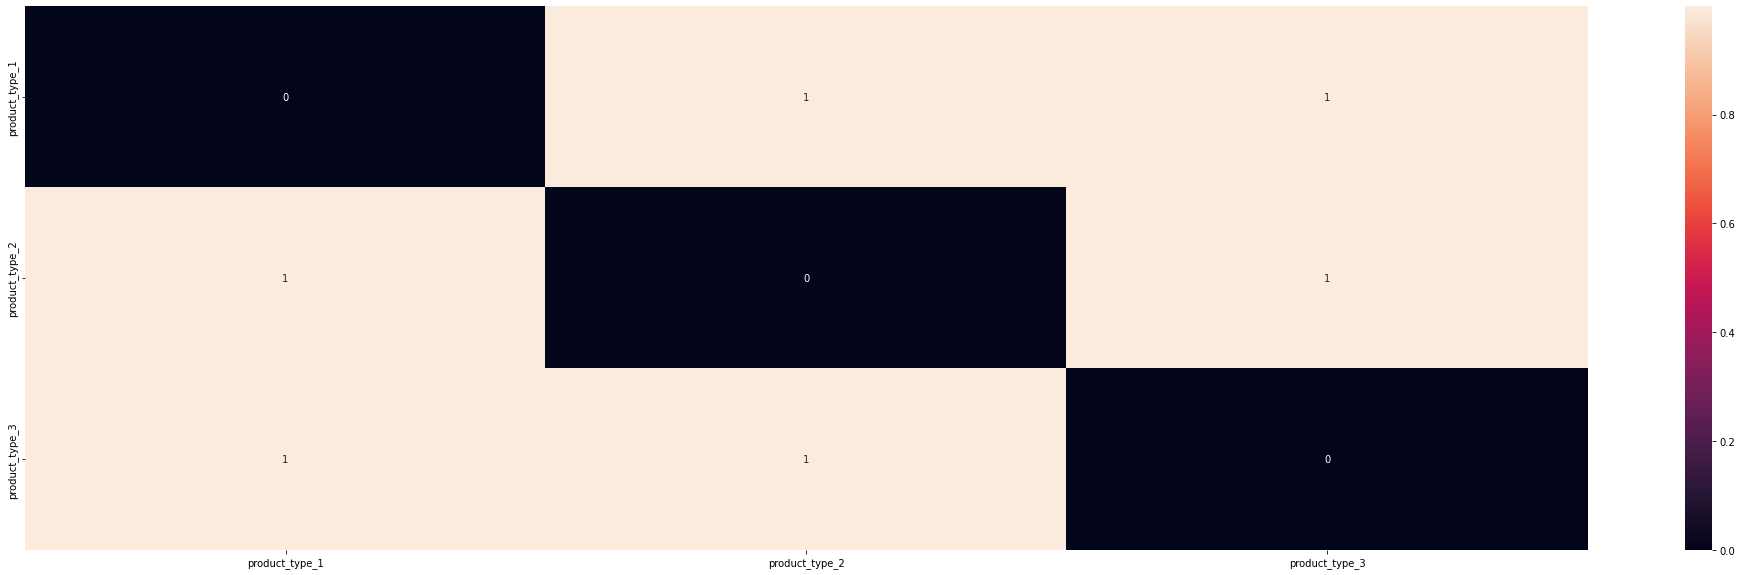

In [47]:
fig, ax = plt.subplots(figsize=(35,10))
sns.heatmap(chi2, annot=True,ax=ax)

In [48]:
df_corr_cat = chi2.unstack().reset_index().rename(columns={0:'correlation_value'})
df_corr_cat["concat"] = df_corr_cat.apply(lambda x: "".join(sorted([x['level_0'],x['level_1']])), axis = 1)
df_corr_cat = df_corr_cat.drop_duplicates("concat")
df_corr_cat.query("correlation_value<0.05 & (level_0!=level_1)")

,level_0,level_1,correlation_value,concat


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text major ticklabel objects>)

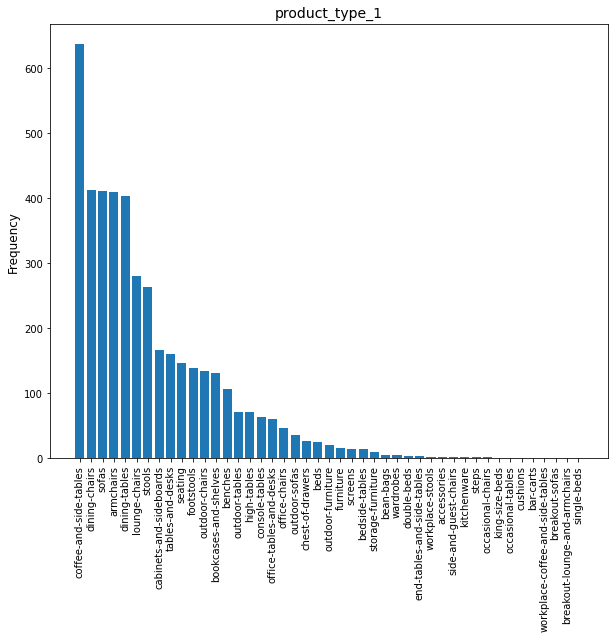

In [49]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_1"].value_counts().index,
        df_data["product_type_1"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_1", size = 14)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

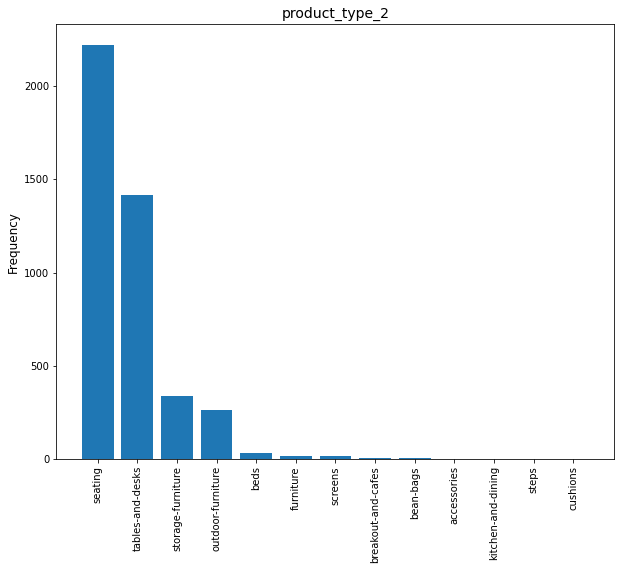

In [50]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_2"].value_counts().index,
        df_data["product_type_2"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_2", size = 14)
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

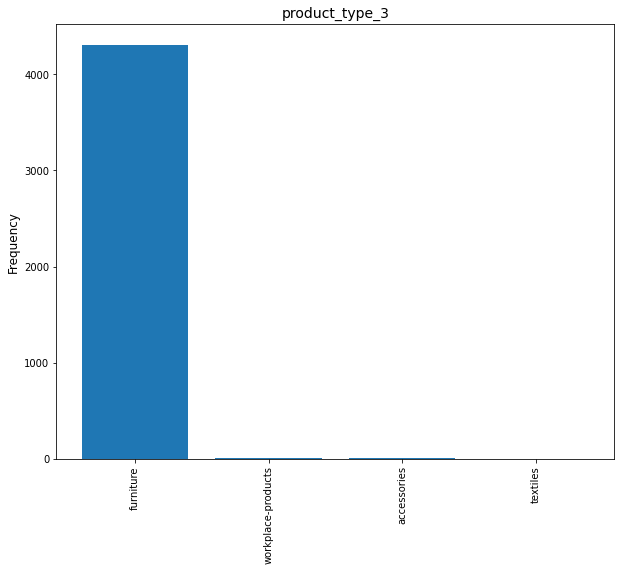

In [51]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["product_type_3"].value_counts().index,
        df_data["product_type_3"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("product_type_3", size = 14)
plt.xticks(rotation=90)

In [52]:
df_data["product_type_1"] = df_data["product_type_1"].astype('category')
df_data["product_type_1"] = df_data["product_type_1"].cat.codes
df_data["product_type_2"] = df_data["product_type_2"].astype('category')
df_data["product_type_2"] = df_data["product_type_2"].cat.codes
df_data["product_type_3"] = df_data["product_type_3"].astype('category')
df_data["product_type_3"] = df_data["product_type_3"].cat.codes

In [53]:
df_data.head(5)

,product_name,brand_name,weight,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,fabrication_price,depth,height,seat height,width,upholstery,finish
1,Ruff Small Armchair,Moroso,28.00,1,9,1,"['pvc', 'polyurethane', 'steel']",792.0000,78.0,72.0,43.0,89.0,A8569 Spring palette 1 45 light grey,NaN
4,"Violin Dining Chair, Upholstered Seat",GUBI,5.50,15,9,1,"['steel', 'foam', 'wood', 'walnut']",379.0332,54.0,76.0,45.0,52.0,Messenger 5 0007,NaN
5,Kofi Rectangular Coffee Table,Hay,21.00,12,12,1,"['oak', 'glass', 'tempered glass']",277.5000,50.0,36.0,39.0,140.0,NaN,NaN
6,MR01 Initial Lounge Chair,GUBI,13.50,24,9,1,['rope'],763.9884,88.0,69.0,33.0,65.0,NaN,NaN
7,"In Situ Modular Corner Sofa, Configuration 3",Muuto,32.65,37,9,1,"['steel', 'wood', 'foam']",3399.0000,287.0,70.0,38.0,287.0,Vidar 3 0554,NaN


In [54]:
df_data.upholstery.value_counts().sort_values(ascending=False).head(25)


A4200 - Geo 01 CS Diamond/Flower Red    87
Main Line Flax Newbury                  75
Sable 1640                              66
Bakul 01                                49
Divina 3 106                            48
Go Atlantic                             42
Aspect ACT01 Atacama                    37
Cairo - Bianco 01                       36
Remix 2 113                             34
Linara 2494/196 Grey Seal               32
Abaco C471 Bianco                       30
Nabuk 2115                              27
Phill 600                               20
57004-0000 Lido-Indigo                  19
A4301 - Stamskin Top 4340-07478         19
Fiord 101                               17
100% polyester                          13
A0867 - Divina 3 623 red                13
Skai Parotega NF amethyst F6461664      12
Remix 2 123                             12
Main Line Flax Aldgate MLF01            11
Galaxy 108                              11
Rivoli 2280                             11
Maia_Avorio

In [55]:
top_25 = [x for x in df_data.finish.value_counts().sort_values(ascending=False).head(25).index]


In [56]:
df_data.loc[~df_data.finish.isin(top_25), 'finish'] = 'others'


In [57]:
df_data['finish'] = df_data['finish'].astype('category')
df_data['finish'] = df_data['finish'].cat.codes

In [58]:
top_25_up = [x for x in df_data.upholstery.value_counts().sort_values(ascending=False).head(25).index]
df_data.loc[~df_data.upholstery.isin(top_25_up), 'upholstery'] = 'others'


In [59]:
df_data['upholstery'] = df_data['upholstery'].astype('category')
df_data['upholstery'] = df_data['upholstery'].cat.codes

In [60]:
top_45_brand = [x for x in df_data.brand_name.value_counts().sort_values(ascending=False).head(45).index]
df_data.loc[~df_data.brand_name.isin(top_45_brand), 'brand_name'] = 'others'
df_data['brand_name'] = df_data['brand_name'].astype('category')
df_data['brand_name'] = df_data['brand_name'].cat.codes

In [61]:
df_data.isnull().sum()


product_name               0
brand_name                 0
weight                     0
product_type_1             0
product_type_2             0
product_type_3             0
basic_materials_cleaned    0
fabrication_price          0
depth                      0
height                     0
seat height                0
width                      0
upholstery                 0
finish                     0
dtype: int64

In [62]:
 df_data.head(2)

,product_name,brand_name,weight,product_type_1,product_type_2,product_type_3,basic_materials_cleaned,fabrication_price,depth,height,seat height,width,upholstery,finish
1,Ruff Small Armchair,26,28.0,1,9,1,"['pvc', 'polyurethane', 'steel']",792.0000,78.0,72.0,43.0,89.0,25,25
4,"Violin Dining Chair, Upholstered Seat",17,5.5,15,9,1,"['steel', 'foam', 'wood', 'walnut']",379.0332,54.0,76.0,45.0,52.0,25,25


In [63]:
df_data["basic_materials_cleaned"] = df_data["basic_materials_cleaned"].apply(eval)

In [64]:
mat_dict = {}
for i in df_data["basic_materials_cleaned"]:
    for j in i:
        if j not in mat_dict:
            mat_dict[j] = 1
        else:
            mat_dict[j] += 1

In [65]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [66]:
to_1D(df_data["basic_materials_cleaned"]).value_counts()

steel             1154
wood              1037
oak                491
foam               437
aluminium          436
                  ... 
spruce               1
fibre glass          1
alder                1
silicone balls       1
black ash            1
Length: 85, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84],
 <a list of 85 Text major ticklabel objects>)

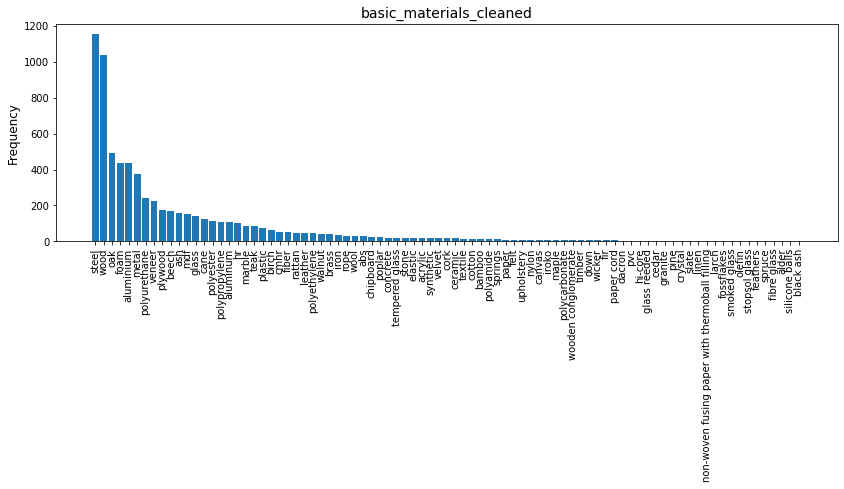

In [67]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_data["basic_materials_cleaned"]).value_counts().index,
        to_1D(df_data["basic_materials_cleaned"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("basic_materials_cleaned", size = 14)
plt.xticks(rotation=90)

In [68]:
basic_mat = df_data["basic_materials_cleaned"].apply(pd.Series)


In [69]:
mats=basic_mat.iloc[:,0].value_counts(normalize = True)

In [70]:
mats=mats.to_dict()

In [71]:
d=[]
for i in df_data["basic_materials_cleaned"]:
    s=0
    for j in i:
      if j in mats:
        s+=mats[j]
    if s!=0:
      s=s/len(i)
    d.append(s)



In [72]:
df_data['basic_materials_cleaned_val'] = d

In [73]:
del df_data['basic_materials_cleaned']

In [74]:
del df_data['product_name']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


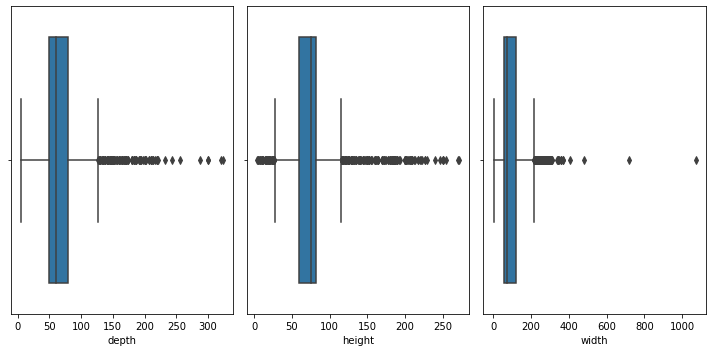

In [75]:
from matplotlib import pyplot as plot
def detectOutliers():
    fig, axs = plot.subplots(1,3, figsize = (10,5))
    plt1 = sns.boxplot(df_data['depth'], ax = axs[0])
    plt2 = sns.boxplot(df_data['height'], ax = axs[1])
    plt3 = sns.boxplot(df_data['width'], ax = axs[2])
    
    plot.tight_layout()
detectOutliers()

In [76]:
df_data.corr()['fabrication_price']

brand_name                    -0.058432
weight                         0.361902
product_type_1                 0.090321
product_type_2                 0.014113
product_type_3                -0.006409
fabrication_price              1.000000
depth                          0.320902
height                         0.147442
seat height                   -0.093652
width                          0.468381
upholstery                    -0.022273
finish                         0.100183
basic_materials_cleaned_val   -0.080224
Name: fabrication_price, dtype: float64

In [77]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4318 entries, 1 to 5748
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand_name                   4318 non-null   int8   
 1   weight                       4318 non-null   float64
 2   product_type_1               4318 non-null   int8   
 3   product_type_2               4318 non-null   int8   
 4   product_type_3               4318 non-null   int8   
 5   fabrication_price            4318 non-null   float64
 6   depth                        4318 non-null   float64
 7   height                       4318 non-null   float64
 8   seat height                  4318 non-null   float64
 9   width                        4318 non-null   float64
 10  upholstery                   4318 non-null   int8   
 11  finish                       4318 non-null   int8   
 12  basic_materials_cleaned_val  4318 non-null   float64
dtypes: float64(7), int

In [78]:
df_data.head(2)

,brand_name,weight,product_type_1,product_type_2,product_type_3,fabrication_price,depth,height,seat height,width,upholstery,finish,basic_materials_cleaned_val
1,26,28.0,1,9,1,792.0000,78.0,72.0,43.0,89.0,25,25,0.091957
4,17,5.5,15,9,1,379.0332,54.0,76.0,45.0,52.0,25,25,0.121409


In [79]:
df_data.isnull().sum()

brand_name                     0
weight                         0
product_type_1                 0
product_type_2                 0
product_type_3                 0
fabrication_price              0
depth                          0
height                         0
seat height                    0
width                          0
upholstery                     0
finish                         0
basic_materials_cleaned_val    0
dtype: int64

Picking out Relevant Attributes


In [80]:
correlation = df_data.corr(method='pearson')
columns = correlation.nlargest(10, 'fabrication_price').index
columns

Index(['fabrication_price', 'width', 'weight', 'depth', 'height', 'finish',
       'product_type_1', 'product_type_2', 'product_type_3', 'upholstery'],
      dtype='object')

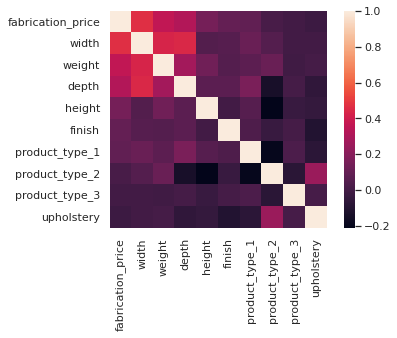

In [81]:
correlation_map = np.corrcoef(df_data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True,  square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

Normalisation

In [82]:
df_data['fabrication_price'] = np.log(df_data['fabrication_price'])


Basic Algos

In [83]:
X = df_data[columns]
Y = X['fabrication_price'].values
X = X.drop('fabrication_price', axis = 1).values

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [85]:
kfold = KFold(n_splits=10)

Linear Regression

In [86]:
model1=LinearRegression()
cv_results1 = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results1.mean(),cv_results1.std())

-0.5864219990597255 0.06835831906752951


Lasso Regression

In [87]:
model2=Lasso()
cv_results2 = cross_val_score(model2, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results2.mean(),cv_results2.std())

-0.6098898160286229 0.06521384975398423


KNeighbors Regressor

In [88]:
model4=KNeighborsRegressor()
cv_results4 = cross_val_score(model4, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results4.mean(),cv_results4.std())

-0.5588028739106051 0.071689556869192


Decision TreeRegressor

In [89]:
model5=DecisionTreeRegressor()
cv_results5 = cross_val_score(model5, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results5.mean(),cv_results5.std())

-0.7543142764728598 0.09968115067608728


Gradient Boosting Regressor

In [90]:
model6=GradientBoostingRegressor()
cv_results6 = cross_val_score(model6, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
print(cv_results6.mean(),cv_results6.std())

-0.4229395386845588 0.04887241442455655


Chosen Model: Gradient Boosting Regressor

In [91]:
final_model=GradientBoostingRegressor()

In [92]:
final_model.fit(X_train,Y_train)

GradientBoostingRegressor()

Predictions

In [93]:
predictions = final_model.predict(X_test)
print(mean_squared_error(Y_test, predictions))

0.43033075881946403


In [94]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions,multioutput='variance_weighted')

0.5390581227746889

In [95]:
comparisons = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
comparisons.head(10)

,Prediction,Test Data
0,6.421806,6.400922
1,5.721471,5.535411
2,7.154028,7.749926
3,7.305895,6.966845
4,6.103851,5.090678
5,5.759379,6.569481
6,7.296970,7.504089
7,7.106882,7.301411
8,6.927451,6.599190
9,7.446482,6.969264


In [96]:
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)
compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(15)

,Test Data,Predicted Price,Difference
0,602,615,12
1,253,305,51
2,2321,1279,1042
3,1060,1489,428
4,162,447,285
5,713,317,395
6,1815,1475,339
7,1482,1220,262
8,734,1019,285
9,1063,1713,650
